In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [38]:
#importing file
pima= pd.read_csv('D:/DATA SCIENCE/Data Sets/EXCEL FILES/india_pima_diabetics.csv', header=None, names=col_names)

In [39]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [55]:
pima.describe()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [56]:
pima.corr()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
pregnant,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedigree,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
label,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


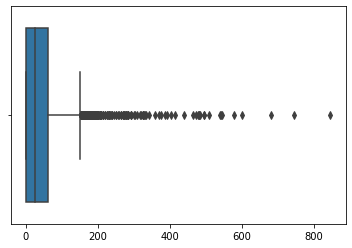

In [72]:
import seaborn as sb
sb.boxplot(pima)

Text(0.5, 1, 'heatmap')

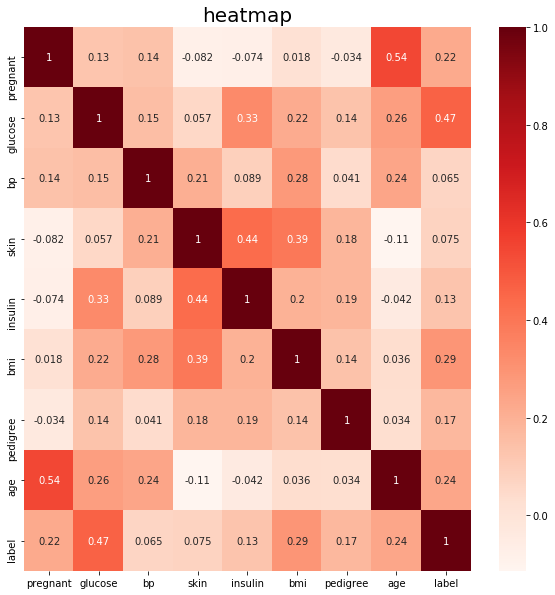

In [66]:
corr = pima.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap="Reds")
plt.title('heatmap', fontsize=20)

In [64]:
print("Diabetes data set dimensions : {}".format(pima.shape))

Diabetes data set dimensions : (768, 9)


In [41]:
col_names=['pregnant','glucose','bp','skin','insulin','bmi','pedigree','age','label']

In [42]:
#split the dataset in features and target variable
feature_cols=['pregnant','insulin','bmi','age','glucose','bp','pedigree']
X=pima[feature_cols]
y=pima.label

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [43]:
#import the class
from sklearn.linear_model import LogisticRegression
#instantiate the model (using the default parameters)
logreg=LogisticRegression()

In [44]:
#fit the model with data
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)

C:\Users\Mohana Ravali\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [45]:
#import the metrics class
from sklearn import metrics
cnf_matrix=metrics.confusion_matrix(y_test,y_pred)
print(cnf_matrix) #26 and 11 are incorrect predictions

[[119  11]
 [ 26  36]]


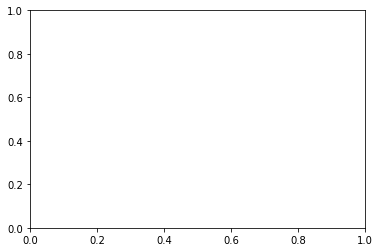

In [46]:
#plotting
class_names=[0,1]
fig, ax=plt.subplots()
tick_marks=np.arange(len(class_names))
ax.xaxis.set_label_position("top")
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
plt.tight_layout()
plt.title('Confusion matrix',y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

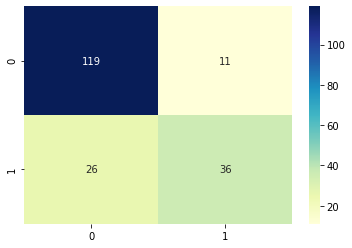

In [54]:
#create heatmap 
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu",fmt='g')

In [48]:
#Accuracy
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))
print("Precision:",metrics.precision_score(y_test,y_pred))
print("Recall:",metrics.recall_score(y_test,y_pred))

Accuracy: 0.8072916666666666
Precision: 0.7659574468085106
Recall: 0.5806451612903226


<function matplotlib.pyplot.show(*args, **kw)>

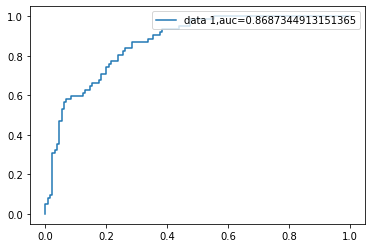

In [50]:
y_pred_proba=logreg.predict_proba(X_test)[::,1]
fpr,tpr,_=metrics.roc_curve(y_test, y_pred_proba)
auc=metrics.roc_auc_score(y_test,y_pred_proba)
plt.plot(fpr,tpr,label="data 1,auc="+str(auc))
plt.legend(loc=1)
plt.show